## Coursera Capstone Project: Crash Severity Report

---

## 1. Introduction

### Background

* Driving is the predominant mode of transport in the United States
* Millions of people drive personal motor vehicles every day in America 
* Thousands of people are injured and killed yearly in collisions
* The majority of collisions can be avoided and measures can be taken to reduce the likelihood of severe collisions

### Business Problem

* Emergency services spend millions of dollars and countless man-hours clearing up wreckages and transporting injured people
* Hospitals receive collision victims regularly, so they must give up beds and space that could have been used for patients with severe health conditions
* Collisions cause congestion on roads, making countless late for work and harming the economy in the long-term
* Collisions cause time off work for recovery, harming micro/small/medium enteprises that may not have workers to spare

### Interested Parties

* Public health, governmental organisations and tax payers that fund emergency service and clean-up jobs
* Hosptitals that must prioritise patients based on severity and room available
* Individuals that stand to lose their lives

### Purpose

* This project will analyse the shared car crash dataset from Seattle City
* The data attributes that describe junction type, weather, road and light conditions will be used to train a machine learning model to predict accident severity
* The results will be discussed and conclusions drawn, concerning whether the data can be used to inform and improve road safety measures
* A reduction in crash severity would save government and tax-payer money, as well as improve public safety and economic stability in industry 

## 2. Data

### Load Dataframe

In [1]:
# Import relevant modules and load "collisions" dataset from csv file
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell #

# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

collisions = pd.read_csv(body)
collisions.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


* Where Severity = 1, describes a collision that caused damage to property only
* Where Severity = 2, describes a collision that caused injury

### Description of Data

* The dataset contains several variables relating to collisions recorded in Seattle City (Washington), USA
* However, the data include several redundant variables to this analysis
* To produce actionable conclusions, the dataset will be cleaned of redundant variables and exploratory data analyses (EDA) will be conducted

## 3. Methodology

### Preparation

In [2]:
collisions.shape

(194673, 38)

In [3]:
# Create 2 dfs and remove columns with ID numbers and redundant variables
columns = ['X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO', 'STATUS', 'ADDRTYPE', 'INTKEY', 'EXCEPTRSNCODE',\
           'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT',\
           'VEHCOUNT', 'INCDTTM', 'SDOT_COLCODE', 'SDOT_COLDESC', 'INATTENTIONIND', 'UNDERINFL', 'PEDROWNOTGRNT', 'SDOTCOLNUM',\
           'SPEEDING', 'ST_COLCODE', 'ST_COLDESC', 'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR', 'LOCATION', 'INCDATE'] 
collisions1 = collisions.drop(columns, 1)
collisions2 = collisions.drop(columns, 1)

# Rename columns to make them easier to read
collisions1.rename(columns={'SEVERITYCODE': 'Severity', 'JUNCTIONTYPE': 'Junction_type', 'WEATHER' : 'Weather_condition',\
                            'ROADCOND': 'Road_condition', 'LIGHTCOND': 'Light_condition'}, inplace=True)
collisions2.rename(columns={'SEVERITYCODE': 'Severity', 'JUNCTIONTYPE': 'Junction_type', 'WEATHER' : 'Weather_condition',\
                            'ROADCOND': 'Road_condition', 'LIGHTCOND': 'Light_condition'}, inplace=True)
collisions1.head()

,Severity,Junction_type,Weather_condition,Road_condition,Light_condition
0,2,At Intersection (intersection related),Overcast,Wet,Daylight
1,1,Mid-Block (not related to intersection),Raining,Wet,Dark - Street Lights On
2,1,Mid-Block (not related to intersection),Overcast,Dry,Daylight
3,1,Mid-Block (not related to intersection),Clear,Dry,Daylight
4,2,At Intersection (intersection related),Raining,Wet,Daylight


### Exploratory Analysis

### How many collisions caused injury? 

In [4]:
# Split dataframe by severity (injury = 2, property damage = 1)
injury = collisions1.loc[collisions1['Severity'] == 2]
property_damage = collisions1.loc[collisions1['Severity'] == 1]

# Calculate number of injuries and property damages
major = injury['Severity'].sum()
minor = property_damage['Severity'].sum()

print("The number of collisions that caused injury was {} and the number of property damage only collisions was {}".format(major,minor))

The number of collisions that caused injury was 116376 and the number of property damage only collisions was 136485


### Are the variables correlated? 

In [5]:
# Label encode collision dataframe
injury = injury.astype('category') 
property_damage = property_damage.astype('category')

from sklearn.preprocessing import LabelEncoder 
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

collisions2['Junction_type'] = le.fit_transform(collisions2['Junction_type'].astype(str))
collisions2['Weather_condition'] = le.fit_transform(collisions2['Weather_condition'].astype(str))
collisions2['Road_condition'] = le.fit_transform(collisions2['Road_condition'].astype(str))
collisions2['Light_condition'] = le.fit_transform(collisions2['Light_condition'].astype(str))

collisions2.head()

,Severity,Junction_type,Weather_condition,Road_condition,Light_condition
0,2,1,4,8,5
1,1,4,6,8,2
2,1,4,4,0,5
3,1,4,1,0,5
4,2,1,6,8,5


* Now we have 2 primary dataframes: 'collisions1' which contains string variables and 'collisions2' which contains label-encoded variables
* This will allow for a more diverse analysis of the data

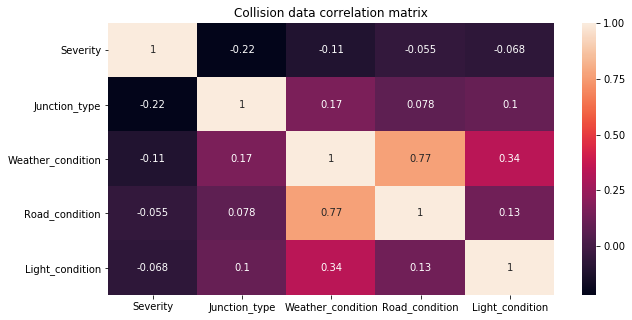

In [17]:
# Create heatmap of correlation matrix
import seaborn as sn
import matplotlib.pyplot as plt

corrMatrix = collisions2.corr()
fig, ax = plt.subplots(figsize=(10,5))  
sn.heatmap(corrMatrix, annot=True)  
plt.title("Collision data correlation matrix")
plt.show()

### What variables appeared in most crashes?

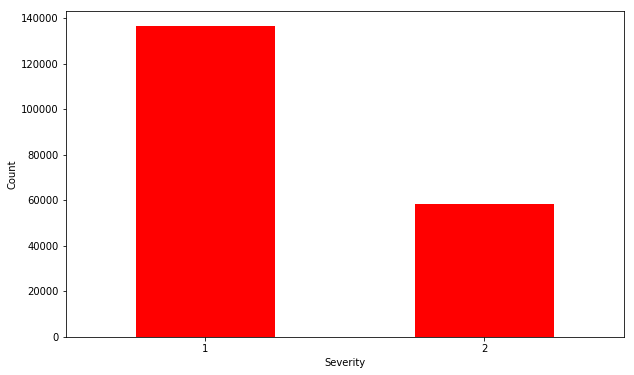

In [7]:
# Create frequency bar graphs for each variable
ax = collisions1['Severity'].value_counts().plot(kind='bar',
                                    figsize=(10,6),
                                    color='red')
ax.set_xlabel("Severity")
ax.set_ylabel("Count")
for tick in ax.get_xticklabels():
    tick.set_rotation(360)
plt.show()

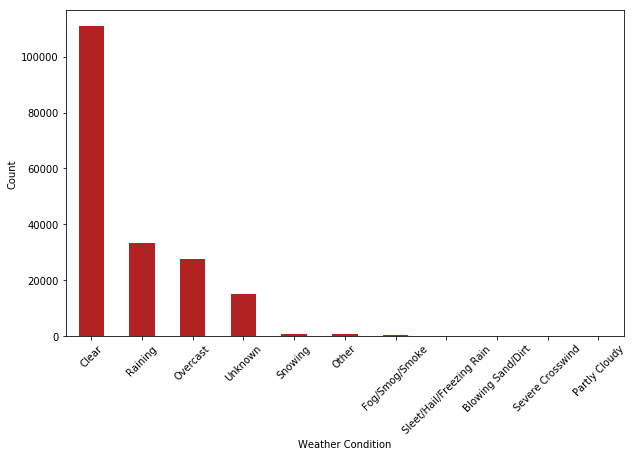

In [8]:
ax = collisions1['Weather_condition'].value_counts().plot(kind='bar',
                                    figsize=(10,6),
                                    color='firebrick')
ax.set_xlabel("Weather Condition")
ax.set_ylabel("Count")
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
plt.show()

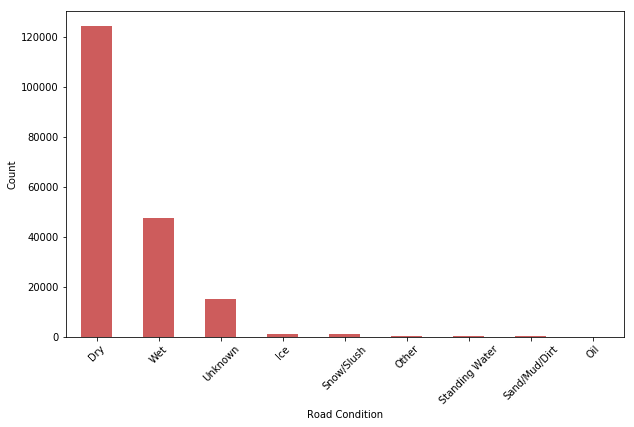

In [9]:
ax = collisions1['Road_condition'].value_counts().plot(kind='bar',
                                    figsize=(10,6),
                                    color='indianred')
ax.set_xlabel("Road Condition")
ax.set_ylabel("Count")
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
plt.show()

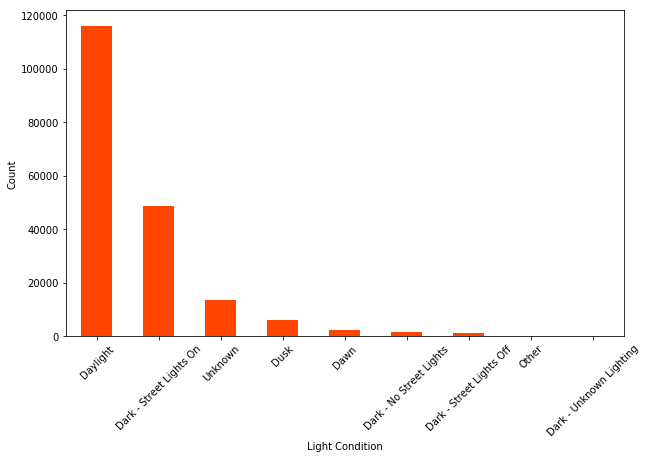

In [10]:
ax = collisions1['Light_condition'].value_counts().plot(kind='bar',
                                    figsize=(10,6),
                                    color='orangered')
ax.set_xlabel("Light Condition")
ax.set_ylabel("Count")
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
plt.show()

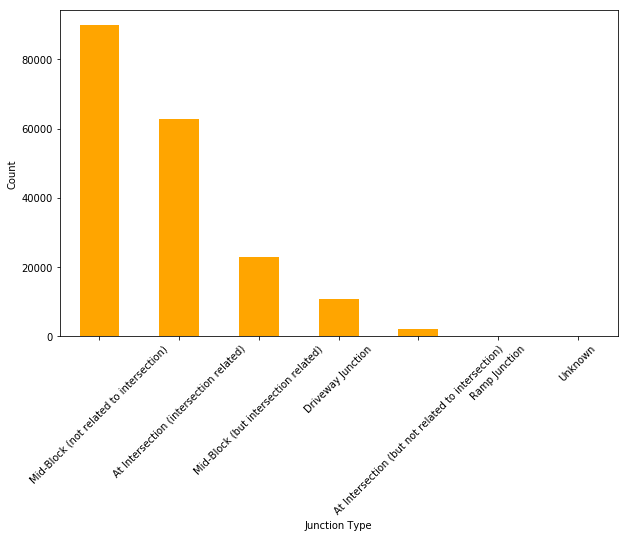

In [11]:
ax = collisions1['Junction_type'].value_counts().plot(kind='bar',
                                    figsize=(10,6),
                                    color='orange')
ax.set_xlabel("Junction Type")
ax.set_ylabel("Count")
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
plt.show()

### Is there an association between severity and other variables?

In [12]:
# Find missing values
collisions1.isnull().sum()

Severity                0
Junction_type        6329
Weather_condition    5081
Road_condition       5012
Light_condition      5170
dtype: int64

In [13]:
# Remove missing values for Chi^2 test
collisions3 = collisions1.dropna(how='any')
collisions3.shape

(183196, 5)

In [14]:
# Crosstabulate Severity and Junction type, then apply Chi^2 test
from scipy import stats
import seaborn as sns

Junction_crosstab = pd.crosstab(collisions3['Severity'], collisions3['Junction_type'])
stats.chi2_contingency(Junction_crosstab)

(8096.729515314511,
 0.0,
 6,
 array([[1.42069717e+03, 4.22969934e+04, 7.26579205e+03, 1.54384268e+04,
         5.99883683e+04, 1.11887672e+02, 4.83465250e+00],
        [6.36302829e+02, 1.89440066e+04, 3.25420795e+03, 6.91457323e+03,
         2.68676317e+04, 5.01123278e+01, 2.16534750e+00]]))

### Machine Learning Model

* Based on the EDA, this project will be approached as a classification problem
* Because there was no clear correlation between variables and association could not be confirmed, linear regression would be inappropriate
* Therefore, a model that predicts outcome based on probability is a better fit for these data
* For that reason, the model chosen for his project will be Naive Bayes

### Naive Bayes Analysis

In [22]:
# Import modules
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

In [32]:
# Assign X and Y values
X = collisions2[['Junction_type', 'Weather_condition', 'Road_condition', 'Light_condition']]
Y = collisions2[["Severity"]]

# Split into train and test data
Xtrain, Xtest, ytrain, ytest = train_test_split(X, Y, random_state=0)

# Fit data to gaussian Naive Bayes
model = GaussianNB().fit(Xtrain, ytrain)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [34]:
# Predict test data and check results
ypred=model.predict(Xtest)
accuracy = accuracy_score(ytest,ypred)
report = classification_report(ypred, ytest)
cm = confusion_matrix(ytest, ypred)

print("Classification report:")
print("Accuracy: ",accuracy)
print(report)
print("Confusion matrix:")
print(cm)

Classification report:
Accuracy:  0.666050257864349
              precision    recall  f1-score   support

           1       0.81      0.74      0.77     37072
           2       0.34      0.43      0.38     11597

   micro avg       0.67      0.67      0.67     48669
   macro avg       0.57      0.58      0.58     48669
weighted avg       0.69      0.67      0.68     48669

Confusion matrix:
[[27450  6631]
 [ 9622  4966]]


## 4. Results

### Number of Collisions by Severity
The number of collisions that caused injury was 116376 and the number of property damage only collisions was 136485

### Correlation Matrix
* According to the correlation analysis, severity was not clearly correlated with junction type, weather, road or light conditions
* However, there was a reasonably strong correlation between road and weather conditions (P=0.77), as would be expected, suggesting the results can be trusted

### Frequency Graphs
The frequency graphs demonstrated that the most common variables in crashes were:
* Damage to property only
* Clear weather conditions
* Dry road conditions
* During daylight
* And mid-block (did not occur on or because of an intersection)

### Chi Square Test of Independance
* Chi square showed a p-value of P = 0
* The expected frequency array provided values lower than 5, violating the Chi square assumptions
* Because of these outputs, we canot trust the Chi square test of independence and further testing was not conducted

### Naive Bayes
* According to the our output, the model has a classification accuracy of 0.66
* This is not a very accurate prediction model
* EDA and Naive Bayes both demonstrate that the variables in this dataset are not significantly correlated, so making predictions from them will be largely inaccurate

## 5. Discussion

Given the data, there is little to suggest that the variables analysed (junction type, road condition, weather condition and light condition) had any effect on crash severity (where severity is defined by whether injury or property damage occured). Although the dataset was large, these results are not necessarily indicative of the effects that these variables have on crash severity. These results do not show any clear influence between weather condition (for example) and crash severity, but weather may well influence whether the crash occured in the first place. Similarly, these results may not be indicative of results that could be gathered in different towns and cities. 

The Naive Bayes analysis produced an accuracy score of 0.66, which is a fairly weak accuracy. However, the model could accurate predict the outcome more than half of the time, which is more than would be expected by chance. This suggests that although there is little linking the variables and crash severity, there is an obscure link present. Based on this result, future studies taking into account a more diverse spectrum of severities (for example, serious injury, fatality, severe damage to car, light damage to car, etc) as well other important variables (such as speed of cars, alcohol level of driver, using mobile phone Y/N, etc) would provide a much more accurate ML model.

## 6. Conclusion

* Understanding car crash data is important to emergency services, publich health and safety bodies, as well as industries and individuals who stand to lose money, workers, and their own lives from road collisions. 
* The dataset demonstrated no clear correlation between the variables and crash severity, which was confirmed by Naive Bayes predictive algorithm. 
* These results are inconclusive and cannot be used to inform road policy or health and safety measures. 
* It is recommended that further testing be done with more variables and, in particular, more attention to the level of severity. 